In [76]:
import pandas as pd
import numpy as np

In [105]:
df = pd.read_csv('file.tsv',sep='\t',names = ['user_id','movie_id','ratings','timestamp'])

In [78]:
df.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [79]:
movie_title = pd.read_csv('Movie_Id_Titles.csv')

In [80]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [81]:
data = pd.merge(df,movie_title, on='item_id') #on, how = inner, left. right, outer

In [82]:
data.head()

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [83]:
# calculating the mean rating of all movies
data.groupby('title')['ratings'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: ratings, dtype: float64

In [84]:
# calculating count rating of all movies
data.groupby('title')['ratings'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

In [85]:
#creating a dataframe with rating count values

ratings = pd.DataFrame(data.groupby('title')['ratings'].mean())
ratings['Number of ratings'] = pd.DataFrame(data.groupby('title')['ratings'].count())

ratings.head()

,ratings,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


(array([520., 171., 122., 103.,  71.,  81.,  57.,  58.,  45.,  38.,  39.,
         25.,  26.,  22.,  25.,  28.,  14.,  16.,  14.,  15.,  24.,  17.,
          7.,   9.,  11.,   6.,  12.,   7.,   6.,   7.,   9.,   4.,   3.,
          6.,   2.,  11.,   2.,   3.,   2.,   2.,   1.,   3.,   0.,   1.,
          1.,   3.,   2.,   1.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,   2.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([  1.        ,   9.32857143,  17.65714286,  25.98571429,
         34.31428571,  42.64285714,  50.97142857,  59.3       ,
         67.62857143,  75.95714286,  84.28571429,  92.61428571,
        100.94285714, 109.27142857, 117.6       , 125.92857143,
        134.25714286, 142.58571429, 150.91428571, 159.24285714,
        167.57142857, 175.9       , 184.22857143, 192.55714286,
        200.88571429, 209.21428571, 217.54285714, 225.87142857,
        234.2       , 242.52857143, 250.85714286, 259.18571429,
        26

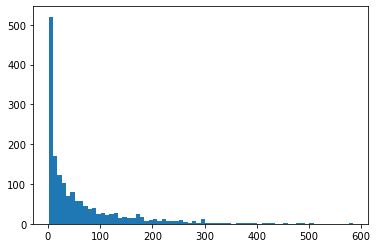

In [86]:
import matplotlib.pyplot as plt

plt.hist(ratings['Number of ratings'], bins=70)

(array([ 69.,   0.,   1.,   0.,   2.,   4.,   0.,   1.,  11.,   0.,   4.,
          7.,   4.,   3.,   9.,   7.,   6.,  52.,   3.,   7.,  19.,  26.,
         15.,  17.,  34.,  20.,  45.,  21.,  27.,  43.,  45.,  38.,  36.,
         32.,  12., 127.,  40.,  63.,  46.,  45.,  57.,  32.,  53.,  59.,
         42.,  49.,  52.,  36.,  45.,  46.,  34.,  35.,  64.,  24.,  27.,
         14.,  15.,  11.,   5.,   2.,   5.,   5.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,  10.]),
 array([1.        , 1.05714286, 1.11428571, 1.17142857, 1.22857143,
        1.28571429, 1.34285714, 1.4       , 1.45714286, 1.51428571,
        1.57142857, 1.62857143, 1.68571429, 1.74285714, 1.8       ,
        1.85714286, 1.91428571, 1.97142857, 2.02857143, 2.08571429,
        2.14285714, 2.2       , 2.25714286, 2.31428571, 2.37142857,
        2.42857143, 2.48571429, 2.54285714, 2.6       , 2.65714286,
        2.71428571, 2.77142857, 2.82857143, 2.88571429, 2.94285714,
        3.        , 3.05714286, 3.11428571, 3.

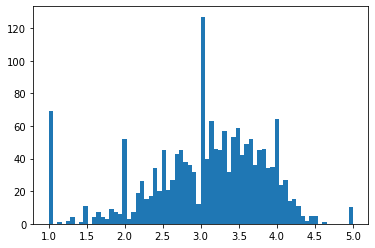

In [87]:
plt.hist(ratings['ratings'], bins=70)

In [88]:
ratings.describe()

,ratings,Number of ratings
count,1664.000000,1664.000000
mean,3.077010,60.097957
std,0.780411,80.963482
min,1.000000,1.000000
25%,2.665094,7.000000
50%,3.162132,27.000000
75%,3.651808,80.250000
max,5.000000,584.000000


In [89]:
ratings.head()

,ratings,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [90]:
movie_mat = data.pivot_table(index='user_id', columns='title',values='ratings')

In [91]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
movie_mat.fillna(0, inplace=True)

In [93]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# analysing correaltion with similar movies

starwar_movie_ratings = movie_mat['Star Kid (1997)']
liar_movie_ratings = movie_mat['Liar Liar (1997)']


In [95]:
similar_to_starwars = movie_mat.corrwith(starwar_movie_ratings)

In [96]:
similar_to_lier = movie_mat.corrwith(liar_movie_ratings)

In [97]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [98]:
corr_starwars.dropna(inplace=True)

In [99]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),-0.005133
1-900 (1994),-0.003651
101 Dalmatians (1996),-0.018995
12 Angry Men (1957),-0.021721
187 (1997),0.244669


In [100]:
corr_starwars.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Star Kid (1997),1.000000
"Leading Man, The (1996)",0.704355
Tokyo Fist (1995),0.576738
Full Speed (1996),0.555164
Time Tracers (1995),0.515246


In [101]:
corr_starwars = corr_starwars.join(ratings['Number of ratings'])

In [102]:
corr_starwars.head()

,Correlation,Number of ratings
title,,
'Til There Was You (1997),-0.005133,9
1-900 (1994),-0.003651,5
101 Dalmatians (1996),-0.018995,109
12 Angry Men (1957),-0.021721,125
187 (1997),0.244669,41


In [103]:
corr_starwars[corr_starwars['Number of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,Number of ratings
title,,
Jackie Brown (1997),0.167068,126
"Edge, The (1997)",0.137659,113
Cop Land (1997),0.136937,175
Boogie Nights (1997),0.133556,189
"Peacemaker, The (1997)",0.133399,136
...,...,...
Raiders of the Lost Ark (1981),-0.048664,420
Toy Story (1995),-0.051377,452
Return of the Jedi (1983),-0.057607,507


In [106]:
from sklearn.model_selection import train_test_split
n_users = df.user_id.unique().shape[0] 
n_movies = df.movie_id.unique().shape[0]

train_data, test_data = train_test_split(df, test_size=0.25)


In [107]:
train_data_matrix = np.zeros((n_users, n_movies))
for line in train_data.itertuples():
    #[user_id index, movie_id index] = given rating.
    train_data_matrix[line[1]-1, line[2]-1] = line[3] 
train_data_matrix


array([[5., 3., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
test_data_matrix = np.zeros((n_users, n_movies))
for line in test_data.itertuples():
    #[user_id index, movie_id index] = given rating.
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
test_data_matrix


array([[0., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
from sklearn.metrics import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')

movie_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

mean_user_rating = train_data_matrix.mean(axis=1)[:, np.newaxis] 
ratings_diff = (train_data_matrix - mean_user_rating) 
user_pred = mean_user_rating + user_similarity.dot(ratings_diff) / np.array([np.abs(user_similarity).sum(axis=1)]).T
user_pred


array([[ 1.541235  ,  0.55160392,  0.45897362, ...,  0.27577814,
         0.27577814,  0.27816979],
       [ 1.28513526,  0.2727666 ,  0.1350439 , ..., -0.07036935,
        -0.07036935, -0.06698121],
       [ 1.29441786,  0.23107481,  0.09789486, ..., -0.10878592,
        -0.10878592, -0.10540506],
       ...,
       [ 1.33051444,  0.29967332,  0.18679589, ..., -0.01662288,
        -0.01662288, -0.01349056],
       [ 1.40068296,  0.38514369,  0.29479177, ...,  0.11773408,
         0.11773408,  0.12033419],
       [ 1.17619729,  0.16453107,  0.04078426, ..., -0.15898468,
        -0.15898468, -0.15602994]])